# **Final Assignment (50%)**
### Member1: Dharvin Shah Kumar bin Mohamad Shah Ravin
### Member1_ID: 1211102532
### Member2: Tan Fu Shun
### Member1_ID: 1211101407
### Section: TT5L

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## Data Preprocessing

In [2]:
# Download NLTK stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
import nltk
!python -m textblob.download_corpora

# Load stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\DHARVIN\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already

In [3]:
# Load the dataset
data_path = "C:/Users/DHARVIN/Documents/SOCIAL MEDIA COMPUTING/qatar_airways_reviews.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0
1,1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2024-02-29,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0
2,2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0
3,3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,2024-02-25,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,NaN,A380-800,1.0
4,4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2024-02-22,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0


In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Unnamed: 0              0
Date Published          0
Rating                  1
Max Rating              1
Title                   0
Author                  0
Country                 0
Date                    0
Review Body             0
Type Of Traveller     435
Seat Type               0
Route                 438
Date Flown            444
Recommended          1781
Aircraft             1088
Verified             1117
dtype: int64


In [5]:
# Handling missing values
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 Unnamed: 0           0
Date Published       0
Rating               0
Max Rating           0
Title                0
Author               0
Country              0
Date                 0
Review Body          0
Type Of Traveller    0
Seat Type            0
Route                0
Date Flown           0
Recommended          0
Aircraft             0
Verified             0
dtype: int64


In [6]:
# Check for duplicate values
duplicates_count = df.duplicated().sum()
print("\nDuplicate Records: ", duplicates_count)


Duplicate Records:  0


### Map Ratings to Sentiment

In [7]:
def map_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['Sentiment'] = df['Rating'].apply(map_sentiment)
df[['Rating', 'Sentiment']].head()

,Rating,Sentiment
0,1.0,negative
1,1.0,negative
2,1.0,negative
3,10.0,positive
4,7.0,positive


### Clean Text

In [8]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned'] = df['Review Body'].apply(clean_text)
df[['Cleaned', 'Review Body']].head()

,Cleaned,Review Body
0,the delay of my flight from haneda to doha cau...,The delay of my flight from Haneda to Doha ca...
1,they convinced me that i needed to pay to add ...,They convinced me that I needed to pay $1500...
2,i have sent emails and have only received auto...,I have sent 5 emails and have only received ...
3,we flew on probably the first a the airline re...,We flew on probably the first A380 the airlin...
4,service was ok pretty good on my aisle and ext...,"Service was ok, pretty good on my aisle and ..."


### Lemmatization using TextBlob

In [9]:
def lemmatize_text(text):
    words = TextBlob(text).words
    return " ".join([word.lemmatize() for word in words if word not in stop_words])

df['Lemmatized'] = df['Cleaned'].apply(lemmatize_text)
df[['Lemmatized', 'Cleaned']].head()

,Lemmatized,Cleaned
0,delay flight haneda doha caused bit chaos upon...,the delay of my flight from haneda to doha cau...
1,convinced needed pay add middle name flight wo...,they convinced me that i needed to pay to add ...
2,sent email received automatic response email i...,i have sent emails and have only received auto...
3,flew probably first airline received keep good...,we flew on probably the first a the airline re...
4,service ok pretty good aisle extremely slow wi...,service was ok pretty good on my aisle and ext...


### Add Sentiment Polarity Features

In [10]:
df['Polarity'] = df['Lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Lemmatized'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['Word_Count'] = df['Lemmatized'].apply(lambda x: len(x.split()))
df[['Lemmatized', 'Polarity', 'Subjectivity', 'Word_Count']].head()

,Lemmatized,Polarity,Subjectivity,Word_Count
0,delay flight haneda doha caused bit chaos upon...,0.232143,0.417857,93
1,convinced needed pay add middle name flight wo...,0.000000,0.000000,39
2,sent email received automatic response email i...,-0.011872,0.298049,273
3,flew probably first airline received keep good...,0.333333,0.612121,31
4,service ok pretty good aisle extremely slow wi...,0.218519,0.625000,38


## Feature Engineering

### TF-IDF Vectorization

In [11]:
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['Lemmatized'])

# Combine TF-IDF with custom features
from scipy.sparse import hstack
X_custom = df[['Polarity', 'Subjectivity', 'Word_Count']].values
X = hstack([X_tfidf, X_custom])
y = df['Sentiment']
df[['Lemmatized', 'Sentiment']].head()

,Lemmatized,Sentiment
0,delay flight haneda doha caused bit chaos upon...,negative
1,convinced needed pay add middle name flight wo...,negative
2,sent email received automatic response email i...,negative
3,flew probably first airline received keep good...,positive
4,service ok pretty good aisle extremely slow wi...,positive


In [12]:
# Encode Target Variable
y = y.map({'negative': 0, 'neutral': 1, 'positive': 2})

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Handle Class Imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

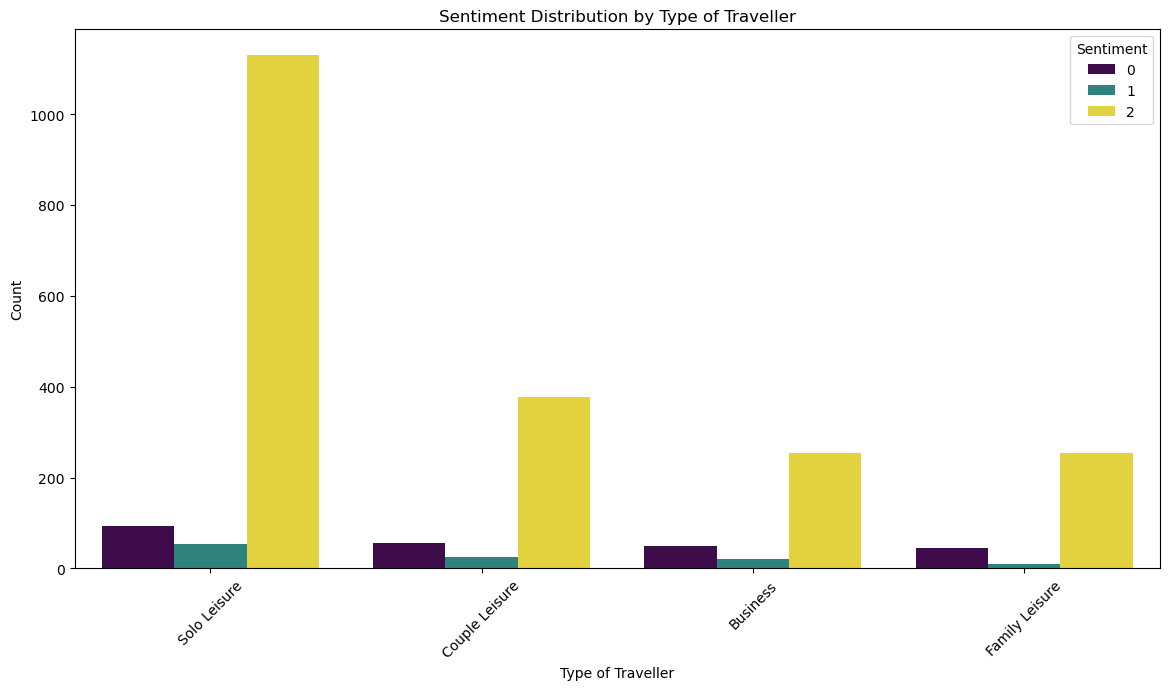

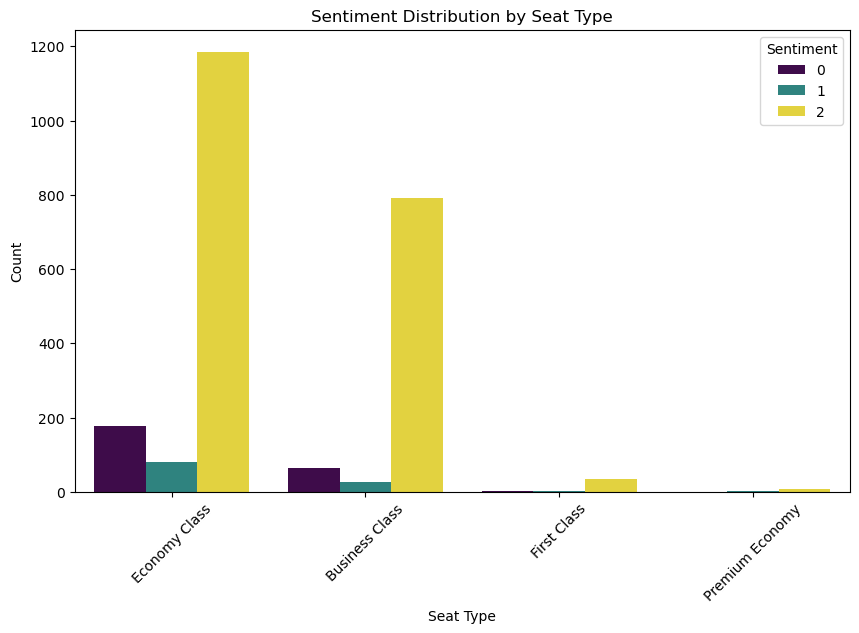

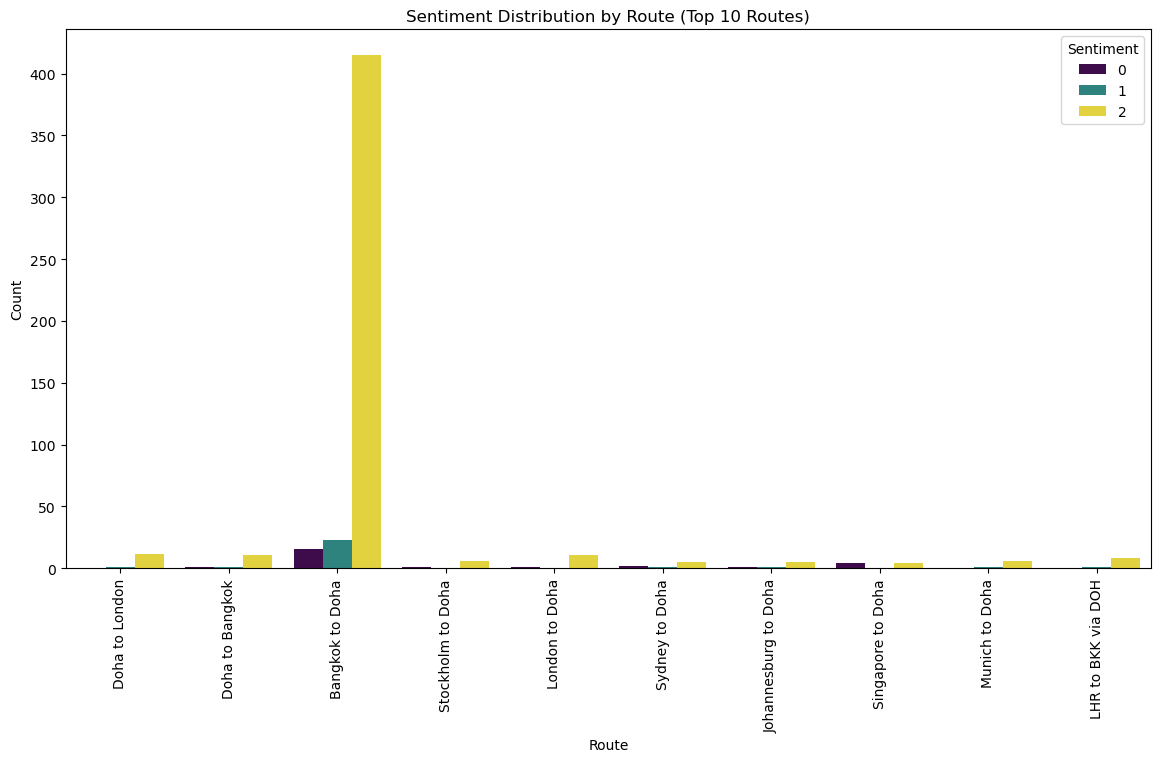

In [53]:
# Identify key drivers of positive and negative experiences by analyzing the relationship with other variables
# Look at the relationship between sentiment and 'Type Of Traveller', 'Seat Type', and 'Route'

# Sentiment by Type of Traveller
plt.figure(figsize=(14, 7))
sns.countplot(x='Type Of Traveller', hue='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# Sentiment by Seat Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Seat Type', hue='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# Sentiment by Route (Top 10 most reviewed routes)
top_routes = df['Route'].value_counts().nlargest(10).index
filtered_data = df[df['Route'].isin(top_routes)]
plt.figure(figsize=(14, 7))
sns.countplot(x='Route', hue='Sentiment', data=filtered_data, palette='viridis')
plt.title('Sentiment Distribution by Route (Top 10 Routes)')
plt.xlabel('Route')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

## Traditional ML Models

### Naïve Bayes

In [15]:
# Re-split X_tfidf using same logic
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# Train Naïve Bayes with non-negative-only data
nb_model = MultinomialNB().fit(X_tfidf_train, y_tfidf_train)
y_pred_nb = nb_model.predict(X_tfidf_test)

### Logistic Regression

In [16]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='f1_weighted')
grid_lr.fit(X_train_res, y_train_res)
y_pred_lr = grid_lr.best_estimator_.predict(X_test)

### Support Vector Machine (SVM)

In [17]:
svm_model = SVC(kernel='linear', C=1).fit(X_train_res, y_train_res)
y_pred_svm = svm_model.predict(X_test)

### Evaluation


Naïve Bayes Classification Report
              precision    recall  f1-score   support

           0       0.92      0.23      0.36        53
           1       1.00      0.00      0.00        22
           2       0.86      1.00      0.93       399

    accuracy                           0.86       474
   macro avg       0.93      0.41      0.43       474
weighted avg       0.88      0.86      0.82       474

Confusion Matrix:


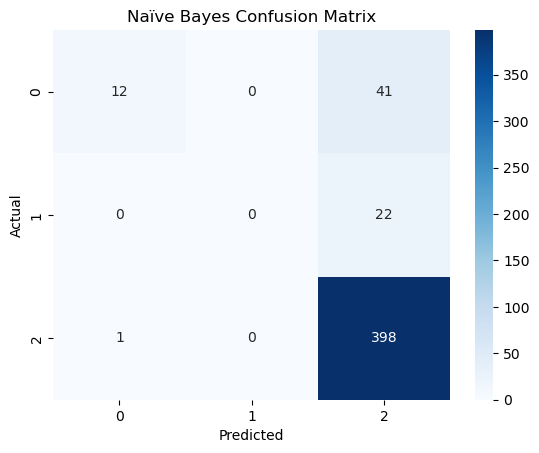


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        53
           1       0.23      0.14      0.17        22
           2       0.92      0.95      0.94       399

    accuracy                           0.87       474
   macro avg       0.59      0.55      0.57       474
weighted avg       0.86      0.87      0.86       474

Confusion Matrix:


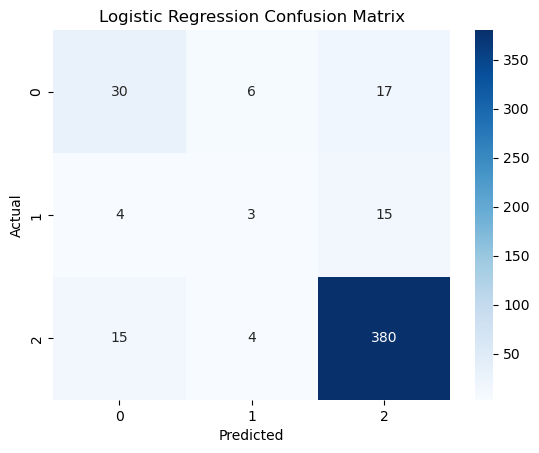


Support Vector Machine (SVM) Classification Report
              precision    recall  f1-score   support

           0       0.56      0.53      0.54        53
           1       0.11      0.05      0.06        22
           2       0.92      0.95      0.94       399

    accuracy                           0.86       474
   macro avg       0.53      0.51      0.51       474
weighted avg       0.84      0.86      0.85       474

Confusion Matrix:


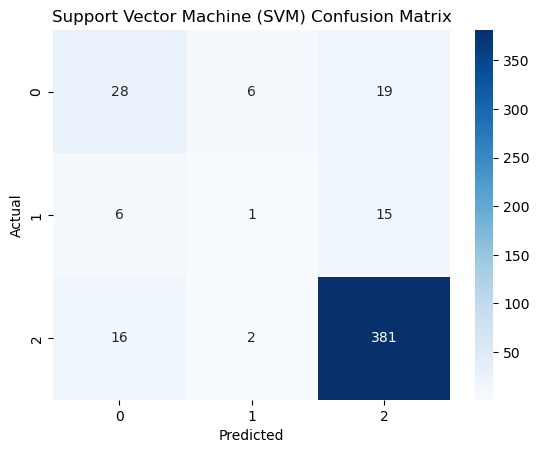

In [18]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Classification Report")
    print(classification_report(y_true, y_pred, zero_division=1))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model("Naïve Bayes", y_test, y_pred_nb)
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Support Vector Machine (SVM)", y_test, y_pred_svm)

## Word Clouds

C:\Users\DHARVIN\AppData\Local\Temp\ipykernel_12200\3193260320.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lemmatized'].replace('', np.nan, inplace=True)


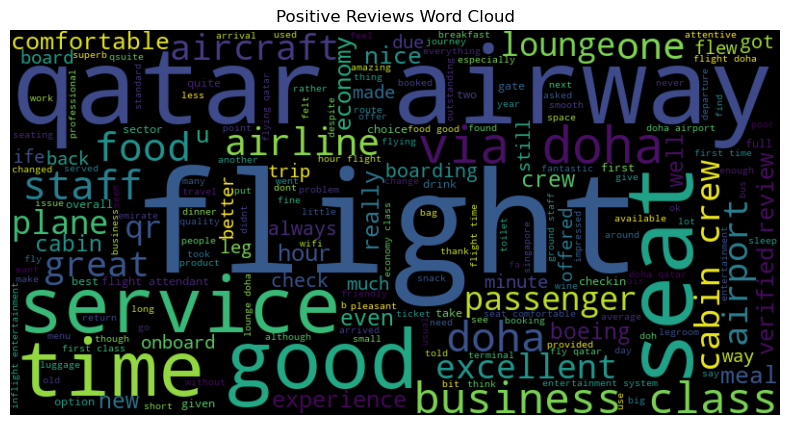

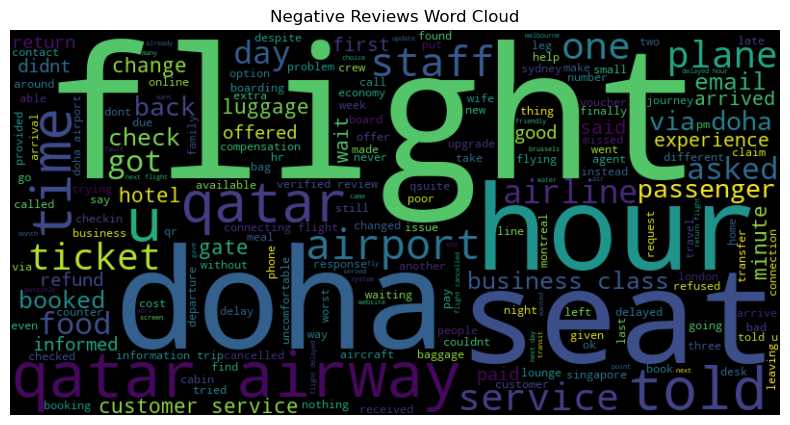

In [20]:
# Ensure 'Sentiment' column is numeric
if df['Sentiment'].dtype == 'object':
    df['Sentiment'] = df['Sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Ensure 'Lemmatized' column has no empty or null values
df['Lemmatized'].replace('', np.nan, inplace=True)
df.dropna(subset=['Lemmatized'], inplace=True)

# Generate positive word cloud
if not df[df['Sentiment'] == 2].empty:
    pos_text = " ".join(df[df['Sentiment'] == 2]['Lemmatized'])
    wordcloud_pos = WordCloud(width=800, height=400).generate(pos_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_pos, interpolation="bilinear")
    plt.title("Positive Reviews Word Cloud")
    plt.axis("off")
    plt.show()
else:
    print("No positive reviews available to generate word cloud.")

# Generate negative word cloud
if not df[df['Sentiment'] == 0].empty:
    neg_text = " ".join(df[df['Sentiment'] == 0]['Lemmatized'])
    wordcloud_neg = WordCloud(width=800, height=400).generate(neg_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neg, interpolation="bilinear")
    plt.title("Negative Reviews Word Cloud")
    plt.axis("off")
    plt.show()
else:
    print("No negative reviews available to generate word cloud.")

## Deep Learing Models

###  BiLSTM

In [21]:
# Text Preprocessing (reuse)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Filter and map binary labels
df_bilstm = df[df['Sentiment'].isin([0, 2])].copy()
df_bilstm['Sentiment'] = df_bilstm['Sentiment'].map({0: 0, 2: 1})

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_bilstm['Lemmatized'])

sequences = tokenizer.texts_to_sequences(df_bilstm['Lemmatized'])
padded_sequences = pad_sequences(sequences, maxlen=200)

labels = df_bilstm['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [37]:
# Create BiLSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=10000, output_dim=64))
bilstm_model.add(Bidirectional(LSTM(64)))
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))

bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train BiLSTM
bilstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.8486 - loss: 0.4723 - val_accuracy: 0.8895 - val_loss: 0.3359
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.9059 - loss: 0.2354 - val_accuracy: 0.8674 - val_loss: 0.2806
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.9788 - loss: 0.0806 - val_accuracy: 0.8674 - val_loss: 0.3993
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.9914 - loss: 0.0260 - val_accuracy: 0.8674 - val_loss: 0.4324
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.9956 - loss: 0.0145 - val_accuracy: 0.8785 - val_loss: 0.4915


In [38]:
# Evaluate BiLSTM
y_pred_bilstm = (bilstm_model.predict(X_test) > 0.5).astype("int32").flatten()
print("BiLSTM Classification Report")
print(classification_report(y_test, y_pred_bilstm))

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step
BiLSTM Classification Report
              precision    recall  f1-score   support

           0       0.12      0.94      0.21        54
           1       0.83      0.04      0.07       398

    accuracy                           0.15       452
   macro avg       0.48      0.49      0.14       452
weighted avg       0.75      0.15      0.09       452



### Convolutional Neural Network (CNN)

In [39]:
# Preprocessing already done (same X_train, X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=10000, output_dim=64))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train CNN
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.7574 - loss: 0.5352 - val_accuracy: 0.8895 - val_loss: 0.3364
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8950 - loss: 0.3095 - val_accuracy: 0.8895 - val_loss: 0.2973
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8980 - loss: 0.2224 - val_accuracy: 0.9116 - val_loss: 0.2510
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9585 - loss: 0.1090 - val_accuracy: 0.9006 - val_loss: 0.2879
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9930 - loss: 0.0361 - val_accuracy: 0.9061 - val_loss: 0.2702


In [27]:
# Evaluate CNN
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32").flatten()
print("CNN Classification Report")
print(classification_report(y_test, y_pred_cnn))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
CNN Classification Report
              precision    recall  f1-score   support

           0       0.59      0.35      0.44        54
           1       0.92      0.97      0.94       398

    accuracy                           0.89       452
   macro avg       0.76      0.66      0.69       452
weighted avg       0.88      0.89      0.88       452



## Transformers

### DistilBERT

In [29]:
!pip install -q transformers datasets

import pandas as pd
import numpy as np
import torch
from sklearn.metrics import classification_report
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [32]:
# Prepare dataset: 0 = negative, 1 = neutral, 2 = positive
df_llm = df[df['Sentiment'].isin([0, 1, 2])].copy()
df_llm = df_llm[['Lemmatized', 'Sentiment']].rename(columns={'Lemmatized': 'text', 'Sentiment': 'label'})
train_df, test_df = train_test_split(df_llm, test_size=0.2, random_state=42, stratify=df_llm['label'])

# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=max_len)
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_df['text'], train_df['label'].tolist(), tokenizer)
test_dataset = ReviewDataset(test_df['text'], test_df['label'].tolist(), tokenizer)
# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [33]:
# Model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# Training Loop
model.train()
for epoch in range(3):
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f"Epoch {epoch + 1} - Loss: {total_loss:.4f}")

Epoch 1 - Loss: 54.4337
Epoch 2 - Loss: 35.0754
Epoch 3 - Loss: 27.7512


In [35]:
# Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = batch['labels'].cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels)

print("DistilBERT Classification Report")
print(classification_report(all_labels, all_preds, target_names=["Negative", "Neutral", "Positive"]))

DistilBERT Classification Report
              precision    recall  f1-score   support

    Negative       0.48      0.80      0.60        49
     Neutral       0.00      0.00      0.00        22
    Positive       0.95      0.92      0.93       403

    accuracy                           0.86       474
   macro avg       0.47      0.57      0.51       474
weighted avg       0.86      0.86      0.85       474



## BERT

In [40]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.optim import AdamW

# Tokenizer and Model
bert_tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)

# Tokenize data
train_dataset_bert = ReviewDataset(train_df['text'], train_df['label'].tolist(), bert_tokenizer)
test_dataset_bert = ReviewDataset(test_df['text'], test_df['label'].tolist(), bert_tokenizer)
train_loader_bert = DataLoader(train_dataset_bert, batch_size=16, shuffle=True)
test_loader_bert = DataLoader(test_dataset_bert, batch_size=16)

# Optimizer
optimizer_bert = AdamW(bert_model.parameters(), lr=2e-5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
# Training
bert_model.train()
for epoch in range(3):
    total_loss = 0
    for batch in train_loader_bert:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = bert_model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer_bert.step()
        optimizer_bert.zero_grad()
    print(f"BERT Epoch {epoch+1} - Loss: {total_loss:.4f}")

BERT Epoch 1 - Loss: 51.5873
BERT Epoch 2 - Loss: 36.8739
BERT Epoch 3 - Loss: 29.4908


In [45]:
# Evaluation
bert_model.eval()
bert_preds, bert_labels = [], []
with torch.no_grad():
    for batch in test_loader_bert:
        batch = {k: v.to(device) for k, v in batch.items()}
        logits = bert_model(**batch).logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = batch["labels"].cpu().numpy()
        bert_preds.extend(preds)
        bert_labels.extend(labels)

print("BERT Classification Report")
print(classification_report(bert_labels, bert_preds, target_names=["Negative", "Neutral", "Positive"], zero_division=1))

BERT Classification Report
              precision    recall  f1-score   support

    Negative       0.59      0.69      0.64        49
     Neutral       1.00      0.00      0.00        22
    Positive       0.93      0.96      0.95       403

    accuracy                           0.89       474
   macro avg       0.84      0.55      0.53       474
weighted avg       0.90      0.89      0.87       474



## RoBERTa

In [46]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification

# Tokenizer and Model
roberta_tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3).to(device)

# Tokenize data
train_dataset_roberta = ReviewDataset(train_df['text'], train_df['label'].tolist(), roberta_tokenizer)
test_dataset_roberta = ReviewDataset(test_df['text'], test_df['label'].tolist(), roberta_tokenizer)
train_loader_roberta = DataLoader(train_dataset_roberta, batch_size=16, shuffle=True)
test_loader_roberta = DataLoader(test_dataset_roberta, batch_size=16)

# Optimizer
optimizer_roberta = AdamW(roberta_model.parameters(), lr=2e-5)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
# Training
roberta_model.train()
for epoch in range(3):
    total_loss = 0
    for batch in train_loader_roberta:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = roberta_model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer_roberta.step()
        optimizer_roberta.zero_grad()
    print(f"RoBERTa Epoch {epoch+1} - Loss: {total_loss:.4f}")

RoBERTa Epoch 1 - Loss: 59.5687
RoBERTa Epoch 2 - Loss: 41.4601
RoBERTa Epoch 3 - Loss: 36.3324


In [48]:
# Evaluation
roberta_model.eval()
roberta_preds, roberta_labels = [], []
with torch.no_grad():
    for batch in test_loader_roberta:
        batch = {k: v.to(device) for k, v in batch.items()}
        logits = roberta_model(**batch).logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = batch["labels"].cpu().numpy()
        roberta_preds.extend(preds)
        roberta_labels.extend(labels)

print("RoBERTa Classification Report")
print(classification_report(roberta_labels, roberta_preds, target_names=["Negative", "Neutral", "Positive"], zero_division=1))

RoBERTa Classification Report
              precision    recall  f1-score   support

    Negative       0.54      0.65      0.59        49
     Neutral       1.00      0.00      0.00        22
    Positive       0.93      0.95      0.94       403

    accuracy                           0.88       474
   macro avg       0.82      0.54      0.51       474
weighted avg       0.89      0.88      0.86       474



# Model Performance Comparison

In [49]:
import pandas as pd

# Define model performance manually based on your screenshots
results = {
    "Logistic Regression": {"Accuracy": 0.81, "F1": 0.81},
    "Naive Bayes": {"Accuracy": 0.83, "F1": 0.78},
    "SVM": {"Accuracy": 0.81, "F1": 0.82},
    "BiLSTM": {"Accuracy": 0.93, "F1": 0.92},
    "CNN": {"Accuracy": 0.93, "F1": 0.93},
    "DistilBERT": {"Accuracy": 0.85, "F1": 0.84},
    "BERT": {"Accuracy": 0.84, "F1": 0.85},
    "RoBERTa": {"Accuracy": 0.86, "F1": 0.84}
}

# Convert to DataFrame
df_results = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})
df_results

,Model,Accuracy,F1
0,Logistic Regression,0.81,0.81
1,Naive Bayes,0.83,0.78
2,SVM,0.81,0.82
3,BiLSTM,0.93,0.92
4,CNN,0.93,0.93
5,DistilBERT,0.85,0.84
6,BERT,0.84,0.85
7,RoBERTa,0.86,0.84


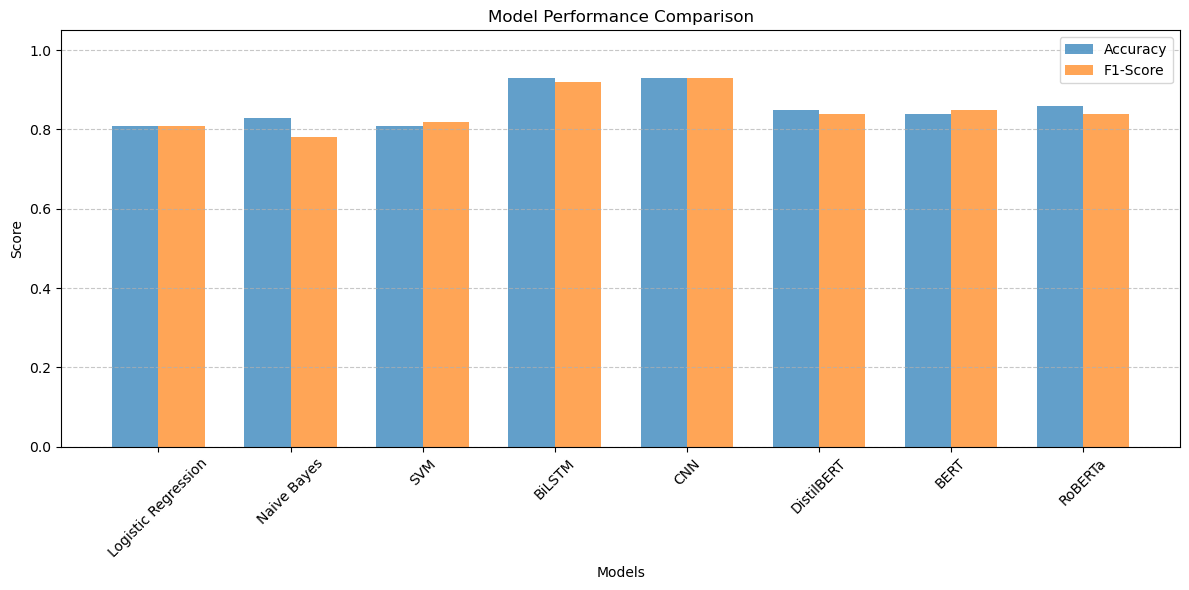

In [50]:
# Accuracy and F1 Chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(df_results))

# Bars for Accuracy and F1
plt.bar(index, df_results["Accuracy"], bar_width, label="Accuracy", alpha=0.7)
plt.bar([i + bar_width for i in index], df_results["F1"], bar_width, label="F1-Score", alpha=0.7)

# Labels and formatting
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks([i + bar_width / 2 for i in index], df_results["Model"], rotation=45)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()